<H1>Construcción de la red </H1>

In [19]:
from ast import literal_eval

import numpy as np
import pandas as pd

df = pd.read_csv('ReformaPensional.csv')
df

,id,text,created_at,conversation_id,geo,public_metrics,context_annotations,entities,author_id,author_username,in_reply_to_user_id,ref_id,ref_type,ref_author_id,ref_author,ref_text,ref_note_tweet
0,1804665614599946262,"@petrogustavo Ahora son los ancianos la CORTINA DE HUMO, usándolos para despertar sentimientos de pesar en los colombianos. No sé trata de ellos señor, usted sólo quiere esconder todos los vicios de la Reforma Pensional y tratar de evitar que se caiga en la Corte Constitucional.",2024-06-22 23:59:46+00:00,1804010291807564057,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0, 'bookmark_count': 0, 'impression_count': 12}","[{'domain': {'id': '10', 'name': 'Person', 'description': 'Named people in the world like Nelson Mandela'}, 'entity': {'id': '953618222753837056', 'name': 'Gustavo Petro', 'description': 'Gustavo Petro'}}, {'domain': {'id': '35', 'name': 'Politician', 'description': 'Politicians in the world, like Joe Biden'}, 'entity': {'id': '953618222753837056', 'name': 'Gustavo Petro', 'description': 'Gustavo Petro'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '847878884917886977', 'name': 'Politics', 'description': 'Politics'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '953618222753837056', 'name': 'Gustavo Petro', 'description': 'Gustavo Petro'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '1070032753834438656', 'name': 'Political figures', 'description': 'Politician'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '1555232052496064513', 'name': 'Colombia politics'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '1555232177687736322', 'name': 'Colombia political figures'}}]","{'mentions': [{'start': 0, 'end': 13, 'username': 'petrogustavo', 'id': '49849732'}], 'annotations': [{'start': 202, 'end': 218, 'probability': 0.4921, 'type': 'Organization', 'normalized_text': 'Reforma Pensional'}, {'start': 258, 'end': 277, 'probability': 0.6461, 'type': 'Place', 'normalized_text': 'Corte Constitucional'}]}",1251157214393294860,JULIOTORRESB3,4.984973e+07,1.804010e+18,replied_to,4.984973e+07,petrogustavo,"No entiendo la inquina contra millones de ancianos y ancianas pobres que por primera vez, incluso en toda la historia del país, puedan recibir un bono pensional decente con el cual tomar un plato de sopa caliente y dormir en una cama cómoda.\n\n¿Qué tienen contra la vejez pobre?… https://t.co/N8f9T2MssC https://t.co/CEqIqFOEZV","No entiendo la inquina contra millones de ancianos y ancianas pobres que por primera vez, incluso en toda la historia del país, puedan recibir un bono pensional decente con el cual tomar un plato de sopa caliente y dormir en una cama cómoda.\n\n¿Qué tienen contra la vejez pobre? ¿Cómo les gustaría que trataran entonces a sus padres y abuelos?\n\nEsta es la verdadera expresión del egoismo social por el cual nuestro país no ha podido progresar."
1,1804665600654139443,"RT @ThomasitaD: Se oponen a la reforma pensional que le ofrece dignidad a los viejitos del país, pero defienden a Doña Segunda por incumpli…",2024-06-22 23:59:42+00:00,1804665600654139443,NaN,"{'retweet_count': 37, 'reply_count': 0, 'like_count': 0, 'quote_count': 0, 'bookmark_count': 0, 'impression_count': 0}",[],"{'mentions': [{'start': 3, 'end': 14, 'username': 'ThomasitaD', 'id': '1565112591948681216'}], 'annotations': [{'start': 114, 'end': 125, 'probability': 0.3469, 'type': 'Place', 'normalized_text': 'Doña Segunda'}]}",64481112,CURTlSEOso,NaN,1.804549e+18,retweeted,1.565113e+18,ThomasitaD,"Se oponen a la reforma pensional que le ofrece dignidad a los viejitos del país, pero defi

In [20]:
def getMentionsList(tweet_entities) -> list[str]:
    return [mention['username'] for mention in literal_eval(tweet_entities if isinstance(tweet_entities, str)
                                                            else "{}"
                                                            ).get("mentions", [])]


users: set[str] = set(df['author_username'].unique())

for tweet_entities in df['entities']:
    users.update(getMentionsList(tweet_entities))
print(users, len(users))

{'CarlosGaitan87', 'roberthcastano', 'DowFinance', 'torrwilso', 'Alxderxan07', 'Carlos_Suaza', 'juanfelipemc25', 'Democrac1a', 'Carmen43267561', 'uchima1983', 'EagleVLS', 'ivanace53581730', 'MauBaMe', 'PradaHumberto', 'HumbertVelasq', 'anateresabernal', 'bossa_german', 'Mafer84156181', 'JosManu01887304', 'MnicaGonzlezPr2', 'LuzAmparo4816', 'elenavallejoa', 'yeisonbet', 'andresangulo', 'britcham_col', 'nadie0601', 'CatherineLeydi', 'sandramos07', 'CorpoturismoCTG', 'GABOZARRATE', 'andrescamachom_', 'Carolinaqos', 'migu_e', 'Luiskpe', 'MintrabajoCol', 'HArtDM14', 'MaraFer04977119', 'EdderJimenez11', 'CristoPosso', 'maldingasea', 'Alejandro8220', 'vi24cruz', 'urisisbenizado', 'MinSaludCol', 'ArgiroCasta888', 'LeylaProfe', 'MariaCl98206199', 'williambolivar7', 'LaBodeguita_TV', 'CamiloAndresRP', 'juanmanuelANQR', 'NoticiasRCN', 'AdrianGullmo', 'pelinegra0818', 'henryloz23', 'TxindurriG', 'pulzo', 'honoriofer52344', 'sernabe', 'xfiloalejo', 'LuzMarinaVelsq5', 'elvaro6303', 'ElCuajinais_', '

In [21]:
user_index = {user: idx for idx, user in enumerate(users)}
n = len(users)
mentions_matrix = np.zeros((n, n), dtype=int)
user_array = np.array(list(users))
for index, row in df.iterrows():
    author = row['author_username']  #usuario que escribió el tweet
    author_idx = user_index[author]

    for mentioned_user in getMentionsList(row['entities']):
        mentioned_user_idx = user_index[mentioned_user]
        mentions_matrix[
            mentioned_user_idx, author_idx] += 1  #La posición i,j equivale a la cantidad de veces que el usuario i ha sido mencionado por el usuario j

mentions_df = pd.DataFrame(mentions_matrix, index=user_array, columns=user_array)
mentions_df

,CarlosGaitan87,roberthcastano,DowFinance,torrwilso,Alxderxan07,Carlos_Suaza,juanfelipemc25,Democrac1a,Carmen43267561,uchima1983,...,alejodm,IvanNameVasquez,LiquenNegro,forvismazarsco,Daissyore,maryurizm26,PactoCol,NMorenoB,Bernard94595812,CathyJuvinao
CarlosGaitan87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
roberthcastano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DowFinance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
torrwilso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alxderxan07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
maryurizm26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PactoCol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NMorenoB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bernard94595812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


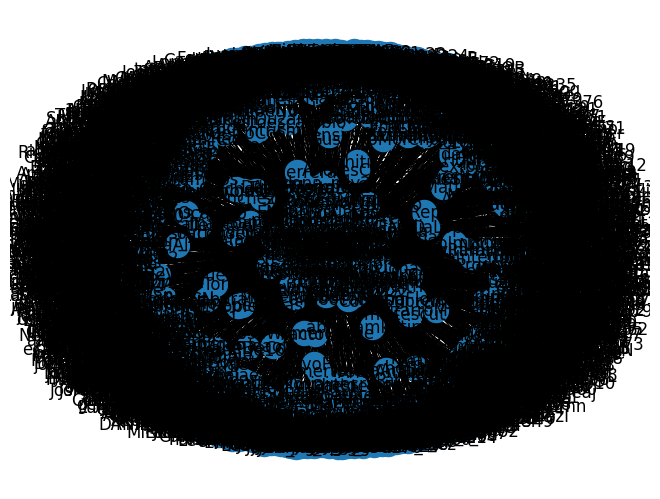

In [22]:
import networkx as nx

mentions_G = nx.from_pandas_adjacency(mentions_df, create_using=nx.DiGraph(directed=True))
nx.draw(mentions_G, with_labels=True)
nx.write_gexf(mentions_G, "mentions.gexf")

<H1>Estimación de la influecia global de cada usuario</H1>

In [35]:
globalInfluence = np.ones(n, int)
metrics_keys: list[str] = ['retweet_count', 'reply_count', 'like_count', 'quote_count', 'bookmarks_count',
                           'impressions_count']
for index, row in df.iterrows():
    author = row['author_username']  #usuario que escribió el tweet
    author_idx = user_index[author]
    tweet_metrics: dict[str, int] = literal_eval(row['public_metrics'])
    n_retweets, n_replies, n_likes, n_quotes, n_bookmarks, n_impressions = (
        tweet_metrics.get(key, 0) for key in metrics_keys )
    globalInfluence[author_idx] += 3 * (n_retweets + n_quotes + n_replies) + 2 * (n_likes + n_bookmarks) + n_impressions + 1
globalInfluence

array([   4, 2150,    7, ...,    2,  101, 4357])

In [36]:
globalInfluence_matrix = mentions_matrix * globalInfluence[:, np.newaxis]
globalInfluence_df = pd.DataFrame(globalInfluence_matrix, index=user_array, columns=user_array)
globalInfluence_df

,CarlosGaitan87,roberthcastano,DowFinance,torrwilso,Alxderxan07,Carlos_Suaza,juanfelipemc25,Democrac1a,Carmen43267561,uchima1983,...,alejodm,IvanNameVasquez,LiquenNegro,forvismazarsco,Daissyore,maryurizm26,PactoCol,NMorenoB,Bernard94595812,CathyJuvinao
CarlosGaitan87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
roberthcastano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DowFinance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
torrwilso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alxderxan07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
maryurizm26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PactoCol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NMorenoB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bernard94595812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


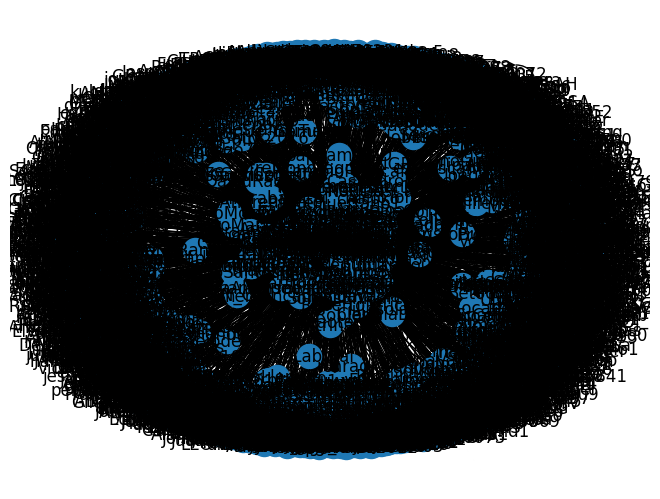

In [37]:
globalInfluence_G = nx.from_pandas_adjacency(globalInfluence_df, create_using=nx.DiGraph(directed=True))
nx.draw(globalInfluence_G, with_labels=True)
nx.write_gexf(globalInfluence_G, "globalInfluence.gexf")

In [39]:
cabal_idx=user_index["MariaFdaCabal"]
globalInfluence[cabal_idx]
alexx_idx=user_index["DeLargeAlexx"]
globalInfluence[cabal_idx], mentions_matrix[cabal_idx, alexx_idx], globalInfluence_matrix[cabal_idx, alexx_idx]

(np.int64(21906), np.int64(7), np.int64(153342))